In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Import **libraries**

In [4]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation
from keras.preprocessing.image import ImageDataGenerator


train and validation data

In [1]:
data1_train = "/content/drive/MyDrive/DRC02/Processed_dataset/train"
data2_test= "/content/drive/MyDrive/DRC02/Processed_dataset/val"


function to count images

In [2]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

count images in each dataset

In [6]:
train_samples =get_files(data1_train)
num_classes=len(glob.glob(data1_train+"/*"))
test_samples=get_files(data2_test)

print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"test images")


6 Classes
1333 Train images
145 test images


image preprocessing 

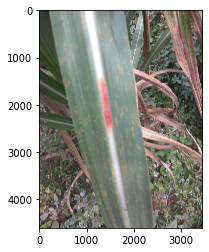

In [ ]:
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/drive/MyDrive/DRC02/Processed_dataset/train/redrot/redb10.jpg')
plt.imshow(img1);



(1, 256, 256, 3)

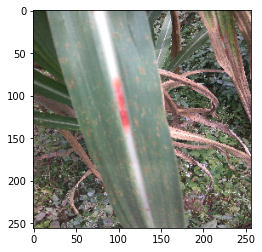

In [ ]:
img2 = image.load_img('/content/drive/MyDrive/DRC02/Processed_dataset/train/redrot/redb10.jpg', target_size=(256, 256))
img = image.img_to_array(img2)
img = img/255
img = np.expand_dims(img, axis=0)
plt.imshow(img2);
img.shape


augmentation

In [ ]:
from keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/DRC02/Processed_dataset/train/redrot/redb10.jpg')  
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        zoom_range=0.2,
        )

x = img_to_array(img) 
x = x.reshape((1,) + x.shape)  
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the directory
i = 0
for batch in datagen.flow(x, batch_size=1,save_to_dir='/content/drive/MyDrive/augm_data', save_prefix='redb10c', save_format='jpg'):
    i += 1
    if i > 5:
        break  # otherwise the generator would loop indefinitely

image

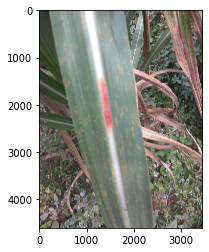

In [ ]:
img3 =image.load_img('/content/drive/MyDrive/DRC02/Processed_dataset/train/redrot/redb10.jpg')
img = image.img_to_array(img3)
img.shape
input_shape=img.shape
input_shape
plt.imshow(img3)


Convolution layer

In [ ]:
model = Sequential()
model.add(Conv2D(3,2,2,input_shape=img.shape)) 
img_batch=np.expand_dims(img,axis=0)
conv_img=model.predict(img_batch)
def visualize_img(img_batch):
  img=np.squeeze(img_batch,axis=0)
  print(img.shape)
  plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2304, 1728, 3)


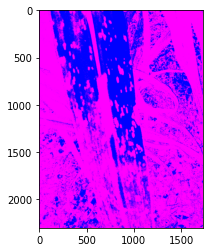

In [ ]:
visualize_img(conv_img)

activation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2304, 1728, 3)


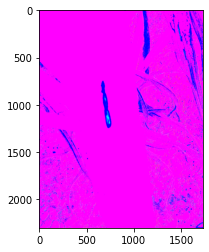

In [ ]:
model = Sequential()
model.add(Conv2D(3,2,2,input_shape=img.shape))
model.add(Activation('relu'))
img_batch=np.expand_dims(img,axis=0)
conv_img=model.predict(img_batch)
def visualize_img(img_batch):
  img=np.squeeze(img_batch,axis=0)
  print(img.shape)
  plt.imshow(img)
visualize_img(conv_img)

pooling layer

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(921, 691, 3)


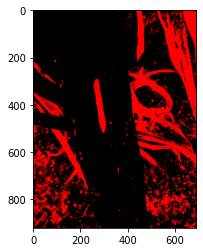

In [ ]:
model = Sequential()
model.add(Conv2D(3,1,1,input_shape=img.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))
img_batch=np.expand_dims(img,axis=0)
conv_img=model.predict(img_batch)
def visualize_img(img_batch):
  img=np.squeeze(img_batch,axis=0)
  print(img.shape)
  plt.imshow(img)
visualize_img(conv_img)

In [ ]:
!pip install -U mxnet-cu101==1.7.0
!pip install d2l==0.16.4


In [ ]:
%matplotlib inline
from mxnet import image, np, npx
from d2l import mxnet as d2l

npx.set_np()

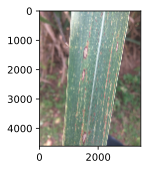

In [ ]:
d2l.set_figsize()
img = image.imread('/content/drive/MyDrive/hlst34.jpg').asnumpy()
d2l.plt.imshow(img);

In [ ]:
def box_corner_to_center(boxes):
    """Convert from (upper-left, lower-right) to (center, width, height)."""
    x1, y1, x2, y2 = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    cx = (x1 + x2) / 2
    cy = (y1 + y2) / 2
    w = x2 - x1
    h = y2 - y1
    boxes = np.stack((cx, cy, w, h), axis=-1)
    return boxes

def box_center_to_corner(boxes):
    """Convert from (center, width, height) to (upper-left, lower-right)."""
    cx, cy, w, h = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    x1 = cx - 0.5 * w
    y1 = cy - 0.5 * h
    x2 = cx + 0.5 * w
    y2 = cy + 0.5 * h
    boxes = np.stack((x1, y1, x2, y2), axis=-1)
    return boxes

here bbox is the abbreviation for bounding box

In [ ]:
s1_bbox, s2_bbox, s3_bbox = [1300.0, 1000.0, 1900.0, 1800.0], [1200.0, 1900.0, 1700.0, 2600.0],[1300.0, 4000.0, 1900.0, 4600.0]

In [ ]:
boxes = np.array((s1_bbox, s2_bbox, s3_bbox))
box_center_to_corner(box_corner_to_center(boxes)) == boxes

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [ ]:
def bbox_to_rect(bbox, color):
  
    return d2l.plt.Rectangle(xy=(bbox[0], bbox[1]), width=bbox[2] - bbox[0],
                             height=bbox[3] - bbox[1], fill=False,
                             edgecolor=color, linewidth=2)

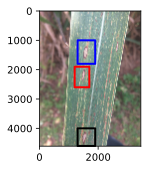

In [ ]:
fig = d2l.plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(s1_bbox, 'blue'))
fig.axes.add_patch(bbox_to_rect(s2_bbox, 'red'))
fig.axes.add_patch(bbox_to_rect(s3_bbox, 'black'));